# 0. Install Dependencies

In [240]:
#!pip install tensorflow
#!pip install gym
#!pip install keras
#!pip install keras-rl2

# 1. The Wumpus world

In [7]:
from gym import Env
from gym.spaces import Discrete, Box
import pandas as pd
import numpy as np
import random
from IPython.display import Image

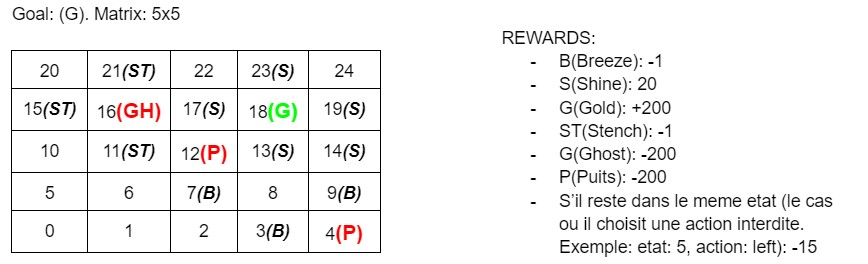

In [8]:
Image(filename='Environnement et Rewards.jpg', width=700)


#### The world we're creating is static. We can easly define methods that would return a world according to an N given, and place the obstacles randomly.

# 2. Creating Wumpus Environment using OpenAI Gym


In [242]:
class WumpusEnv(Env):
    def __init__(self):
        # Actions we can right, up, left, down
        self.action_space = Discrete(4)
        self.observation_space = np.arange(1, 26)
        self.state = 0
        
    def step(self, action,episode):

        done=False
        ostate=self.state
        state=self.state
        if action == 0 and state % 5 != 4:
                state=state+1
            #print("-right")
        elif action == 1 and state < 20:
                state=5+state
            #print("-up")
        elif action==2 and state%5 !=0:
            state=state-1
            #print("-left")
        elif action==3 and state>4:
            state=state-5
            #print("-down\n")

        if (episode==1000):
            print(state)
        # Calculate reward
        if state==ostate: #unacceptable action chosen
            reward= -15
        elif state==3  or state==9 or state==7: #breeze
            reward= -1
        elif state==4 or state==12: #puits
            return state, -200, True, {}
        elif state==11 or state==21 or state==15: #stench
            reward = -1
        elif state==16 : #ghost
            return state, -200, True, {}
        elif state==18: #gold
            return state, 200, True, {}
        elif state==29 or state==17 or state==13 or state==23: #shine
            reward=20
        else:
            reward=0 #5
        
        self.state=state
        info = {}
        
        return state, reward, done, info

    def render(self):
        pass
    
    def reset(self):
        self.state = 0
        return self.state
    

In [247]:
env = WumpusEnv()

# Applying Q Learning Algorithm


In [244]:
action_space_size = env.action_space.n
state_space_size = (env.observation_space.shape[0],) # Add comma to create a tuple
q_table = np.zeros((state_space_size[0], action_space_size))#

In [245]:
num_episodes = 1000
max_steps_per_episode = 100

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.01

In [246]:
rewards_all_episodes = []
#Q-Learning algorithm
for episode in range (num_episodes): 
    state = env.reset()
    rewards_current_episode = 0
    
    for step in range (max_steps_per_episode):
        # Exploration-exploitation trade-off 
         
        #Two methods to balance between exploration and exploitation, we'll use the 2nd one
        '''exploration_rate_threshold = random.uniform (0, 1)
        if exploration_rate_threshold > exploration_rate: 
            action = np.argmax(q_table[state,:])
        else:
            action =env.action_space.sample()'''
        
        if episode>400: 
            action = np.argmax(q_table[state,:])
        else:
            action =env.action_space.sample()
            
        new_state, reward, done, info = env.step(action,episode)
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
        state = new_state
        rewards_current_episode += reward
                                                                                                
        if done == True:
            break
                                                                                                
    # Exploration rate decay
    #if(state!=18):
        #rewards_current_episode= -20
    exploration_rate= min_exploration_rate +(max_exploration_rate-min_exploration_rate)* np.exp(-exploration_decay_rate*episode)
    
    rewards_all_episodes.append(rewards_current_episode)

                                                                                                
# Calculate and print the average reward per thousand episodes 
rewards_per_thosand_episodes=np.split(np.array(rewards_all_episodes), num_episodes/100)
count = 100
print(" ______Average reward per thousand episodes______\n")
for r in rewards_per_thosand_episodes:
    print(count, ": ",str(sum(r/100)))
    count += 100
                                                                                                
# Print updated Q table
print("\n\n______Q-table______\n")
action_names = ["right", "up", "left", "down"]
df = pd.DataFrame(q_table,columns=action_names)

print(df)

 ______Average reward per thousand episodes______

100 :  -248.0199999999999
200 :  -271.46999999999997
300 :  -248.8799999999999
400 :  -229.71000000000006
500 :  213.89999999999984
600 :  218.99999999999983
700 :  218.99999999999983
800 :  218.99999999999983
900 :  218.99999999999983
1000 :  218.99999999999983


______Q-table______

         right          up        left        down
0    93.543128  208.429830   74.172718   73.893542
1    98.121222   96.495657   86.574350   75.260829
2   113.810399  102.774345   81.560367   77.442637
3  -199.764196  129.127811   91.821659   80.116512
4     0.000000    0.000000    0.000000    0.000000
5   210.535182   77.415032   75.594014   88.146261
6   212.661800   72.615723   88.446871   85.126051
7   215.820000 -199.940062   85.494598   89.000707
8    49.955778  218.000000   92.814213   84.013508
9    22.536546   35.401485   77.269148 -154.246415
10   71.163535   57.054030   60.203924   84.742714
11 -199.887216 -199.845289   66.421024   79.731352


### We can extract the best path from our Q-Table in the following way:
##### Goal: cell 18 (The gold)

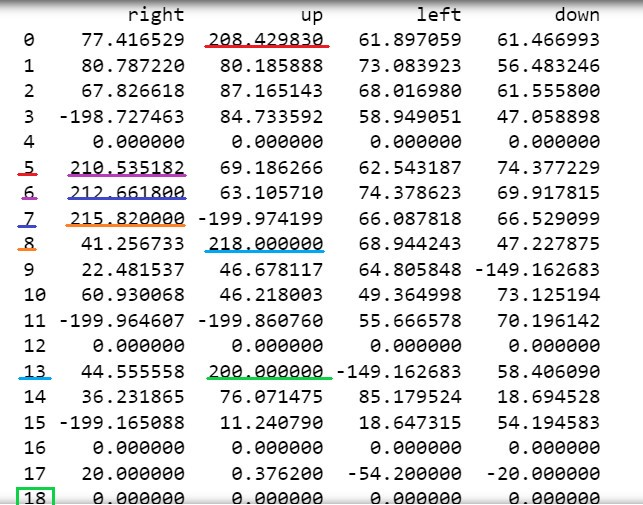

In [10]:
Image(filename='Wumpus Solution.jpg', width=500)